# DAT 203 - Lab Assignment #1

Author: Colin Bowers

Date: May 6, 2023


In [1]:
# 1 - Import Numpy, Pandas, Scipy, matplotlib, sklearn, csv libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as sk 

In [2]:
# 2 - Open supplied CSV file “Office”
df = pd.read_csv("Office.csv")

In [3]:
# 3 - Characterize the dataset:
df.describe()

,Units,Unit Price
count,43.000000,43.000000
mean,49.325581,20.308605
std,30.078248,47.345118
min,2.000000,1.290000
25%,27.500000,3.990000
50%,53.000000,4.990000
75%,74.500000,17.990000
max,96.000000,275.000000


In [4]:
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,4-Jul-14,East,Richard,Pen Set,62,4.99
1,12-Jul-14,East,Nick,Binder,29,1.99
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49
3,29-Jul-14,East,Susan,Binder,81,19.99
4,7-Aug-14,Central,Matthew,Pen Set,42,23.95


In [5]:
n_row, n_col = df.shape
(n_row, n_col)

(43, 6)

In [6]:
# 4 - Create two new variables X and Y with number of values matching length of columns in the imported file:
X = np.random.random(n_row)
Y = np.random.random(n_row)

In [7]:
# 5 - Scale created variables to be within 0-100 value range
X *= 100
Y *= 100

In [8]:
# 6 - Create third variable Z as a function between X and Y that utilizes functions “+”, “*”, “/”
Z = X * Y

In [9]:
# 7 - Create forth dataset ZZ as ascending range of values from 0 to the number of elements each vector should have:
ZZ = np.arange(n_row)

In [10]:
# 8 - Combine X, Y, Z and ZZ informing a table T:
T = np.array(list(zip(X, Y, Z)))
T.shape

(43, 3)

In [11]:
# 9 - Combine T with the original dataset imported from CSV:
# 10 - Create labels for new dataset so X, Y and Z columns are labeled as “Demand”, Supply”, “Projected growth”, ‘Index’
# 11 - Combine labels with the dataset:
df["Demand"] = X
df["Supply"] = Y
df["Projected growth"] = Z
df["Index"] = ZZ
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Demand,Supply,Projected growth,Index
0,4-Jul-14,East,Richard,Pen Set,62,4.99,3.962656,12.882364,51.048379,0
1,12-Jul-14,East,Nick,Binder,29,1.99,8.266136,0.118962,0.983358,1
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49,50.104278,4.411967,221.058399,2
3,29-Jul-14,East,Susan,Binder,81,19.99,29.545533,91.974445,2717.434005,3
4,7-Aug-14,Central,Matthew,Pen Set,42,23.95,69.833536,96.745689,6756.093507,4


In [12]:
# 12 - Select rows that have values satisfying following conditions:
#      Units>20; Price<100, Demand<500
df[ (df.Units>20) & (df["Unit Price"]<100) & (df.Demand<500) ]

,OrderDate,Region,Rep,Item,Units,Unit Price,Demand,Supply,Projected growth,Index
0,4-Jul-14,East,Richard,Pen Set,62,4.99,3.962656,12.882364,51.048379,0
1,12-Jul-14,East,Nick,Binder,29,1.99,8.266136,0.118962,0.983358,1
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49,50.104278,4.411967,221.058399,2
3,29-Jul-14,East,Susan,Binder,81,19.99,29.545533,91.974445,2717.434005,3
4,7-Aug-14,Central,Matthew,Pen Set,42,23.95,69.833536,96.745689,6756.093507,4
5,15-Aug-14,East,Richard,Pencil,35,4.99,78.742631,40.644442,3200.450317,5
10,27-Sep-14,West,James,Pen,76,1.99,75.578787,54.979962,4155.318806,10
11,5-Oct-14,Central,Morgan,Binder,28,8.99,56.440878,53.589687,3024.648994,11
12,14-Oct-14,West,Thomas,Binder,57,19.99,58.187765,65.146922,3790.753778,12
13,22-Oct-14,East,Richard,Pen,64,8.99,87.164705,92.252778,8041.186200,13


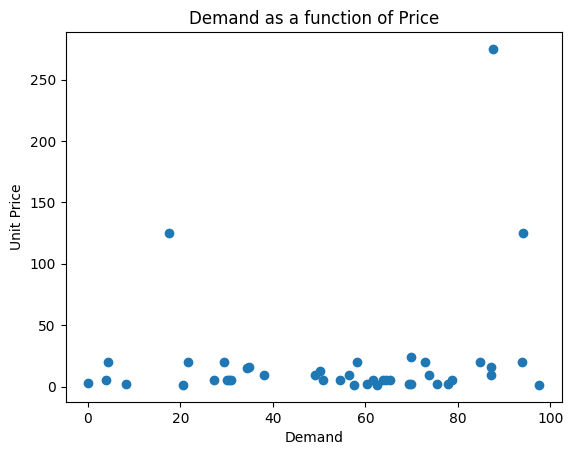

In [13]:
# 13 - Plot demand as a function of price:
plt.scatter(df["Demand"], df["Unit Price"])
plt.title("Demand as a function of Price")
plt.xlabel("Demand")
plt.ylabel("Unit Price")
plt.show()

In [14]:
# 4 - Export the dataset as a CSV file:
df.to_csv("lab1_out.csv")